In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.integrate as integrate 
%matplotlib inline

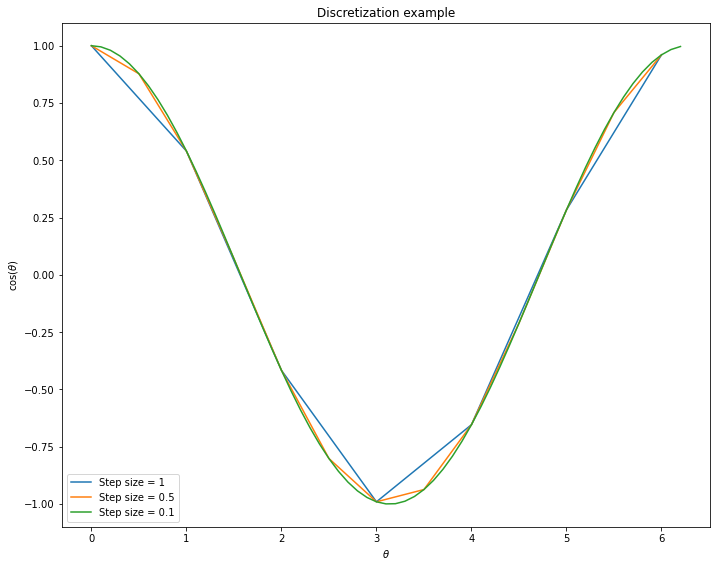

In [2]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Discretization example")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\cos(\theta)$")

start = 0
stop = 2 * np.pi

#この書き方は[1, 2, 3]の順で値を代入できる!
for step_size in [1, 0.5, 0.1]:
    x = np.arange(start, stop, step_size)
    y = np.cos(x)
    ax.plot(x, y, label = "Step size = "+str(step_size))

ax.legend()

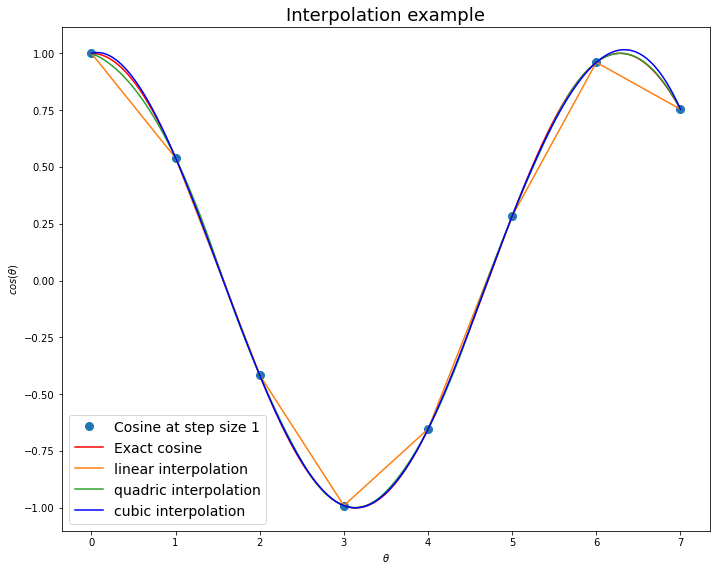

In [3]:
start = 0
stop = 7               #choose an integer
fig = plt.figure(figsize = (9, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title ("Interpolation example", fontsize = 18)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$cos(\theta)$")

# +1 so we do not try to interpolate outside the available points!
x = np.arange(start, stop+1, 1) #補間するのであえて粗くしている
xf = np.arange(start, stop, 0.0001) #←こっちの方が細かい、補間する必要もないかも
y = np.cos(x)
yf = np.cos(xf)
ax.plot(x, y, 'o', markersize = 8, label = "Cosine at step size 1")
# 'o'は丸の点という意味
ax.plot(xf, yf, label = "Exact cosine", color = "red")


#この下からinterpolationする!! Note: interp "1" d
f_linear = interpolate.interp1d(x, y, kind ="linear")
#(x, y)を補間するような関数 f_linear
y_linear = f_linear(xf)
ax.plot(xf, y_linear, label = "linear interpolation")

# kind ="quad","cubic"は splev(spline evaluation)と呼ばれる。
f_quad = interpolate.interp1d(x, y, kind = "quadratic")
y_quad = f_quad(xf)
ax.plot(xf, y_quad, label = "quadric interpolation")

f_cubic = interpolate.interp1d(x, y, kind = "cubic")
y_cubic = f_cubic(xf)
ax.plot(xf, y_cubic, label = "cubic interpolation", color = "blue")

ax.legend(fontsize = 14)

In [4]:
x = np.arange(0, 2 * np.pi, 0.01)
y = np.cos(x)
def f(k):
    return np.cos(k)

arg_min = np.argmin(y)
print(arg_min)
#This returns the index of array!
x_min = x[314]
print(f(x_min))

arg_max = np.argmax(y)
print(arg_max)

#途中

314
-0.9999987317275395
0


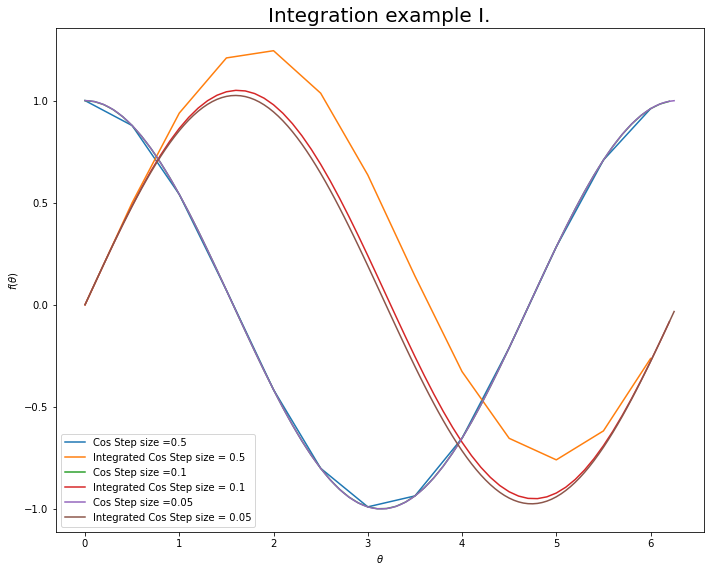

In [5]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Integration example Ⅰ.", fontsize = 20)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$f(\theta)$")

start = 0
stop = 2 * np.pi 
steps  = [0.5, 0.1, 0.05]
for step_size in steps:
    x = np.arange(start, stop, step_size)
    y = np.cos(x) #This is array
    
    ax.plot(x, y, label = "Cos Step size ="+str(step_size))
    
    y_int = np.zeros_like(y) # An array of zeros "the same size as y".
    for ix in range(len(y)): # len(y) is "the length of the array y"
        y_sum = np.sum(y[0:ix]) * step_size
        y_int[ix] = y_sum #[0,0,0,・・・]のarrayを積分値に置き換えている
    ax.plot(x, y_int, label = "Integrated Cos Step size = "+str(step_size))
    
ax.legend()

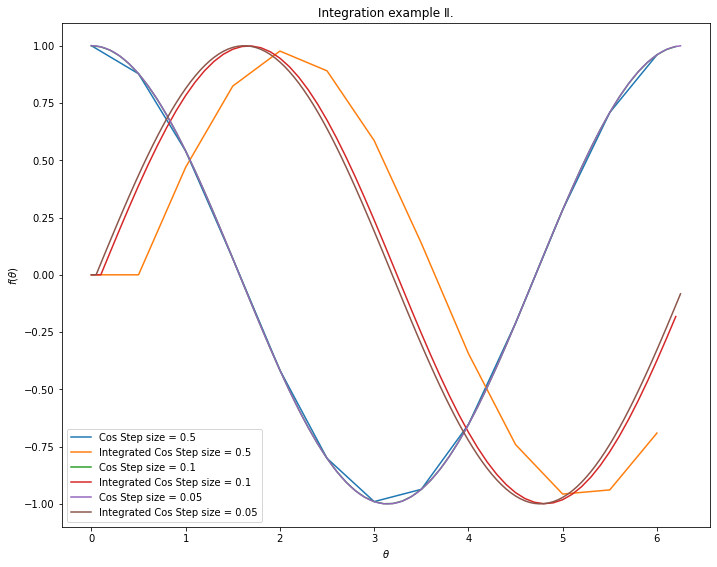

In [6]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Integration example Ⅱ.")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$f(\theta)$")
start = 0
stop = 2 * np.pi 
steps = [0.5, 0.1, 0.05]

for step_size in steps:
    x = np.arange(start, stop, step_size)
    y = np.cos(x)
    ax.plot(x, y, label = "Cos Step size = "+str(step_size))
    
    y_int = np.zeros_like(y) # An array of zeros "the same size as y".
    
    #Now  integrate y for each x:
    #scipy.integrate.trapzを使う! y[a:b]→yの範囲 aからbまで x
    for ix in range(0, len(y)):
        y_sum = integrate.trapz(y[0 : ix], x[0 : ix])
        
        #The x is given for the steps, which do not need to be equal sized...???
        
        y_int[ix] = y_sum
        
    ax.plot(x, y_int, label = "Integrated Cos Step size = "+str(step_size))
        
    
    
ax.legend()

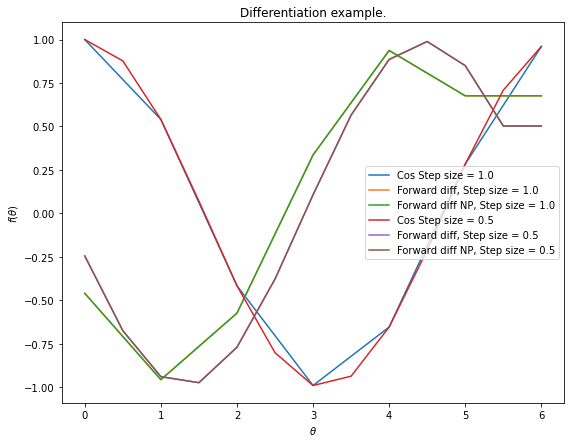

In [7]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_subplot(111)
ax.set_title("Differentiation example.")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$f(\theta)$")
start = 0.
stop = 2*np.pi
steps = [1.0, 0.5]

for step_size in steps:
    x = np.arange(start, stop, step_size)
    y = np.cos(x)
    ax.plot(x, y, label = "Cos Step size = "+str(step_size))
    
    y_diff = np.zeros_like(y) # _like(y) → An array of zeros the same size as y.
    
    # Now take the difference of y for each x:
                                                            # Because we shift, we are one point short.下記参照↓
                                                            #Shiftの意味↓
                                                            # dy[ix]の値を、ix+1番目とix番目の値から決める　
                                                            # →　[N-1]番目までしか決まらず、最後の[N]番目を出力できない
    for ix in range(0, len(y)-1):
        dy = (y[ix+1] - y[ix])/(x[ix+1] - x[ix]) #NOTE THE SHIFT
        # The x is given for the steps, which do not need to be equalsized.
        y_diff[ix] = dy #zerosの配列に微分の値を代入
        
        #負のインデックスは末尾から何番目かを表す！！
        #ただし正のインデックスは０からだが、末尾は-1から始まる！(-0ではない)
        
        #最後の点の微分値を計算
    y_diff[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])#Use a backward difference for last point,末端の次の値は定義してない
    ax.plot(x, y_diff , label = "Forward diff, Step size = "+str(step_size))
        
    #This gives EXACT same result as above, but faster.
    dy = np.zeros_like(y)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2]) # Use a backward difference for last point
    ax.plot(x, dy, label = "Forward diff NP, Step size = "+str(step_size))

    #要はnp.diff(y)/np.diff(x)で同様に近似した微分値の配列を得られるということ

ax.legend()

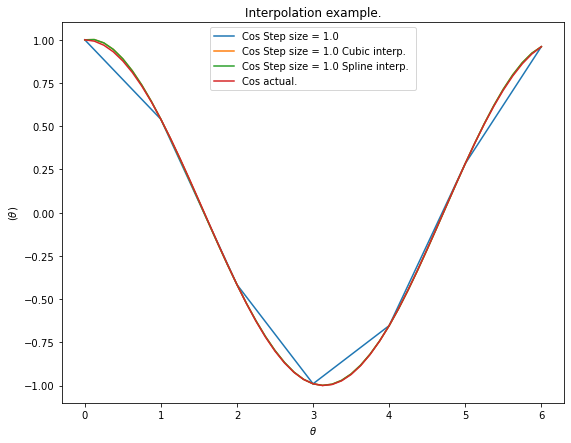

In [8]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_subplot(111)
ax.set_title("Interpolation example.")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$(\theta)$")
start = 0.
stop = 2*np.pi
steps = [1.0] # Only one step_size, so the plots don't get too messy.
for step_size in steps:
    x = np.arange(start, stop, step_size)
    y = np.cos(x)
    ax.plot(x, y, label = "Cos Step size = "+str(step_size))
    
    # Cubic interpolation.
    f_interp_c = interpolate.interp1d(x, y, kind = "cubic") # This returns a *fuction*
    
    x_new = np.arange(start, stop-2./8., 1./8. ) # A step 1/4 the previous size.
    y_new_c = f_interp_c(x_new)
    ax.plot(x_new, y_new_c, label = "Cos Step size = "+str(step_size)+" Cubic interp. ")
    
    # Spline interpolation
    spline_rep = interpolate.splrep(x, y)
    y_new_s = interpolate.splev(x_new, spline_rep)
    ax.plot(x_new, y_new_s, label = "Cos Step size = "+str(step_size)+" Spline interp. ")
    ax.plot(x_new, np.cos(x_new), label = "Cos actual.")

ax.legend()

(array([0., 0., 0., 0., 2., 3., 4., 6., 6., 6., 6.]),
 array([ 1.        ,  1.06437875, -0.25947486, -1.17077532, -0.63581318,
         0.8085993 ,  0.96017029,  0.        ,  0.        ,  0.        ,
         0.        ]),
 3)

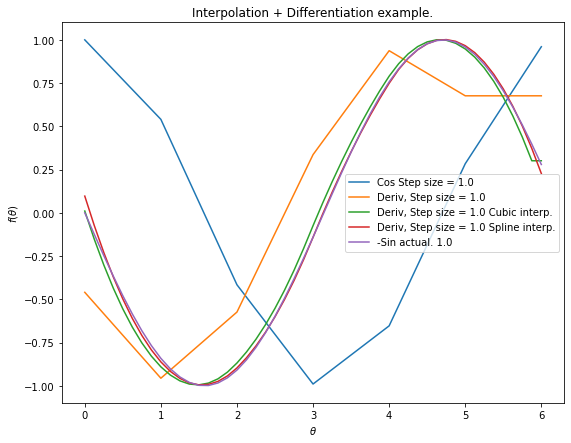

In [23]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_subplot(111)
ax.set_title("Interpolation + Differentiation example.")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$f(\theta)$")
start = 0.
stop = 2*np.pi
steps = [1.0]
for step_size in steps:
    x = np.arange(start, stop, step_size)
    y = np.cos(x)
    ax.plot(x, y, label = "Cos Step size = "+str(step_size))
    
    dy = np.zeros_like(y)
    dy[0 : -1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2]) # Use a backward difference for last point
    ax.plot(x, dy, label = "Deriv, Step size = "+str(step_size))
    
    # Cubic interpolation.
    f_interp_c = interpolate.interp1d(x, y, kind = "cubic") # This returns a *function*

    x_new = np.arange(start, stop - 2./8., 1./8.)
    y_new_c = f_interp_c(x_new)
    dy_new_c = np.zeros_like(x_new)
    dy_new_c[0 : -1] = np.diff(y_new_c)/np.diff(x_new)
    dy_new_c[-1] = (y_new_c[-1] - y_new_c[-2])/(x_new[-1] - x_new[-2])
    ax.plot(x_new, dy_new_c, label = "Deriv, Step size = "+str(step_size)+" Cubic interp.")
    
    #Spline interpolation
    
    #interpolate.splrep(x, y)で、yをxについて補間した配列を生成。
    spline_rep = interpolate.splrep(x, y)
    
    #このコード最強すぎる。 der = n で n回微分した補間済みの配列を生成。
    dy_new_s = interpolate.splev(x_new, spline_rep, der = 1) # First derivative in one step!
    
    ax.plot(x_new, dy_new_s, label = "Deriv, Step size = "+str(step_size)+" Spline interp.")
    
    ax.plot(x_new, -np.sin(x_new), label = "-Sin actual. "+str(step_size))
    
    
    
ax.legend()
# For the last point, the spline routine does better, 
# since the internal routines are better handling the end points.
# Spline interpolationを使おう！
spline_rep

In [20]:
#Interpolation＋integrationももちろんできる！